In [1]:
import pandas as pd
import numpy as np
import pickle

import altair as alt
from functools import reduce
from sklearn.cluster import KMeans

#importing local libraries for drawings (because they clutter)
#   They should still be available within the git repo but it's pretty much template stuff from altair
import sys
sys.path.append('../')
from lib.builders import age02 as b2
import lib.drawMaps as draw

with (open('world_1.p', 'rb')) as pickle_file:
    world = pickle.load(pickle_file)
    
world

# The age of the ancients

the terrain and all of the natural features are formed in the first age. Mountains, rivers, lakes, forrests. Once the land has settle, the first cities appear. 

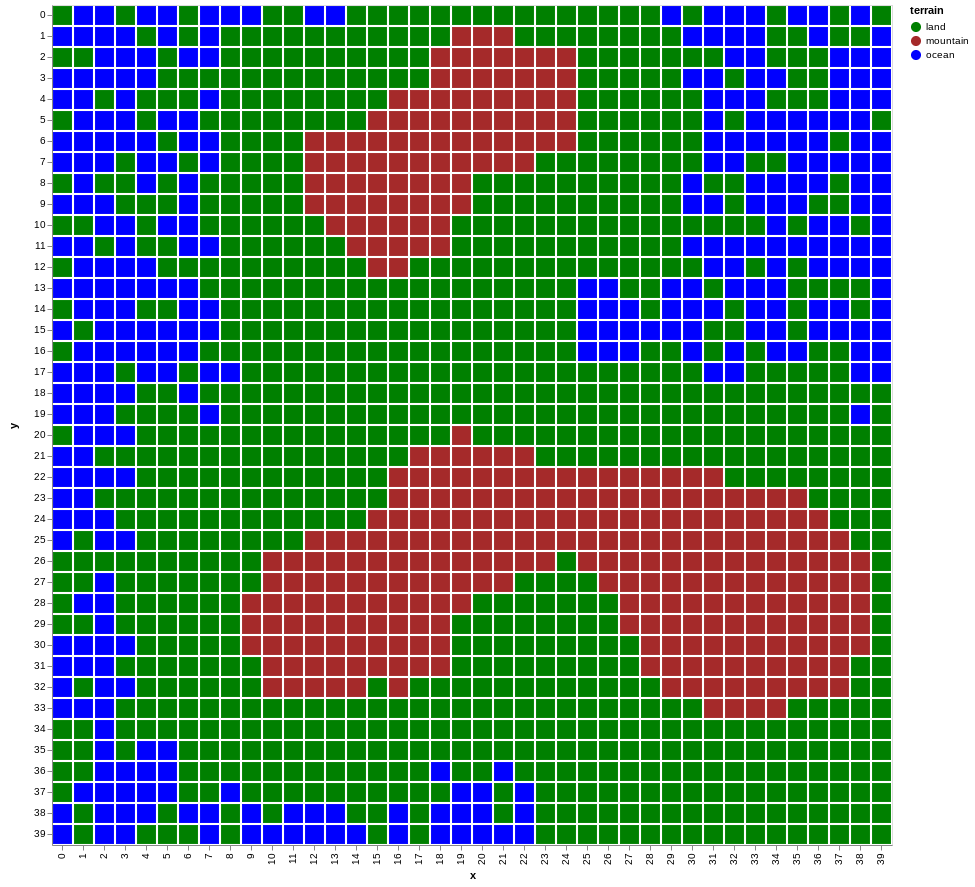

In [2]:
draw.drawTerrainTypes(world.grid_elevation,world.landscape)

the `__init__` method of a city takes a founding age and a location (which can be generated randomly via `World.get_random_chord`). The init method automatically generates a name. The default nation is the name of the town.

In [4]:
new_town = b2.town([1,2],1)
new_town

town of Stenchcrest: population: 1 location: [1,2] founded 1

## The age of civilization

Cities grow for a set number of aeons. During each eon
* n new villages are born
* each village has g% chance to grow

at the end of this age cities merge together to become nations. 

In [8]:
#the number of nations that will emerge
landscape['n nations'] = 8 
#overal age of the 'civilized era' (age of unconflicted growth)
landscape['eon'] = 10 
#the number of towns spawned per iteration
landscape['town_spawn'] = 1
#the likelyhood a town will increase in size
landscape['town_birthrate'] = .3

In [9]:
towns = []
for i in range(landscape['eon']):
    for s in range(int(np.round(np.random.normal(2, 1)))):
        key = np.random.choice(df[df['terrain']!='ocean'].index)
        towns.append(town(build.keyChord(key),i))
        
    for t in towns:
        t.population_growth(landscape['town_birthrate'])
towns

[town of Stormlight: population: 2 location: [18,14] founded 0,
 town of Buckloch: population: 4 location: [28,10] founded 0,
 town of Stonelight: population: 6 location: [34,37] founded 0,
 town of Clearrun: population: 4 location: [38,32] founded 0,
 town of Godmark: population: 3 location: [28,18] founded 1,
 town of Icechild: population: 1 location: [17,39] founded 2,
 town of Badgerford: population: 4 location: [35,37] founded 3,
 town of King'sjaw: population: 4 location: [25,33] founded 3,
 town of Magerail: population: 4 location: [23,8] founded 3,
 town of Splitmain: population: 3 location: [9,29] founded 4,
 town of Fairrun: population: 4 location: [25,15] founded 4,
 town of Land'srise: population: 3 location: [18,36] founded 4,
 town of Artbridge: population: 2 location: [17,38] founded 5,
 town of Lilymelt: population: 1 location: [16,36] founded 5,
 town of Doomrest: population: 4 location: [9,5] founded 5,
 town of Magecombe: population: 2 location: [19,27] founded 5,
 t

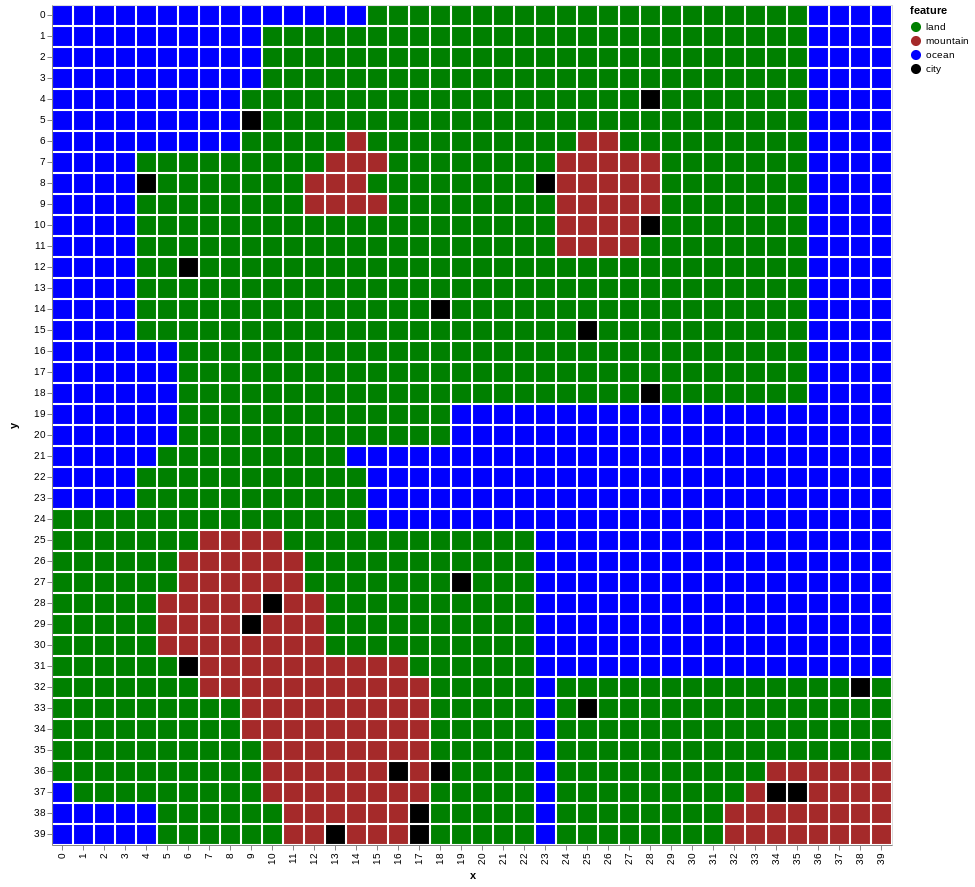

In [10]:
df['feature'] = df['terrain']
for t in towns:
    df.loc[t.key,'town'] = t.name
    df.loc[t.key,'feature'] = 'city'
    
draw.drawCities(df)

In [11]:
cities = df[df['feature']=='city']
k_means = KMeans(init='k-means++', n_clusters=landscape['n nations'], n_init=10)
k_means.fit(cities[['x','y']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
landscape['nations'] = build.labelNations(k_means.labels_)
landscape['nations']

{0: 'Waterchild',
 1: 'Ratglen',
 2: 'Oakloch',
 3: 'Godward',
 4: 'Stormblaze',
 5: "Founder'sblade",
 6: 'Brinefort',
 7: 'Leaffold'}

In [14]:
df.loc[df['feature']=='city','nation number'] = k_means.labels_
df['nation'] = df['nation number'].apply(lambda x: build.assignNation(x,landscape=landscape))

for t in towns:
    try:
        t.diplomacy['nation'] = df.loc[df['town']==t.name,'nation'].values[0]
        t.diplomacy['fealty'] = 1
    except:
        continue
    
df[df['feature']=='city'].sort_values(['nation'])

,y,rainfall,x,key,elevation,terrain,feature,town,nation number,nation
key,,,,,,,,,,
25:33,33,0.0,25,25:33,2.0,land,city,King'sjaw,6.0,Brinefort
19:27,27,34.0,19,19:27,5.0,land,city,Magecombe,6.0,Brinefort
28:18,18,65.0,28,28:18,1.0,land,city,Godmark,5.0,Founder'sblade
25:15,15,40.0,25,25:15,4.0,land,city,Fairrun,5.0,Founder'sblade
10:28,28,50.0,10,10:28,43.0,mountain,city,Stormpike,3.0,Godward
6:31,31,11.0,6,6:31,28.0,mountain,city,Lilyhail,3.0,Godward
9:29,29,38.0,9,9:29,41.0,mountain,city,Splitmain,3.0,Godward
28:4,4,0.0,28,28:4,15.0,land,city,Snakemain,7.0,Leaffold
28:10,10,24.0,28,28:10,25.0,mountain,city,Buckloch,7.0,Leaffold


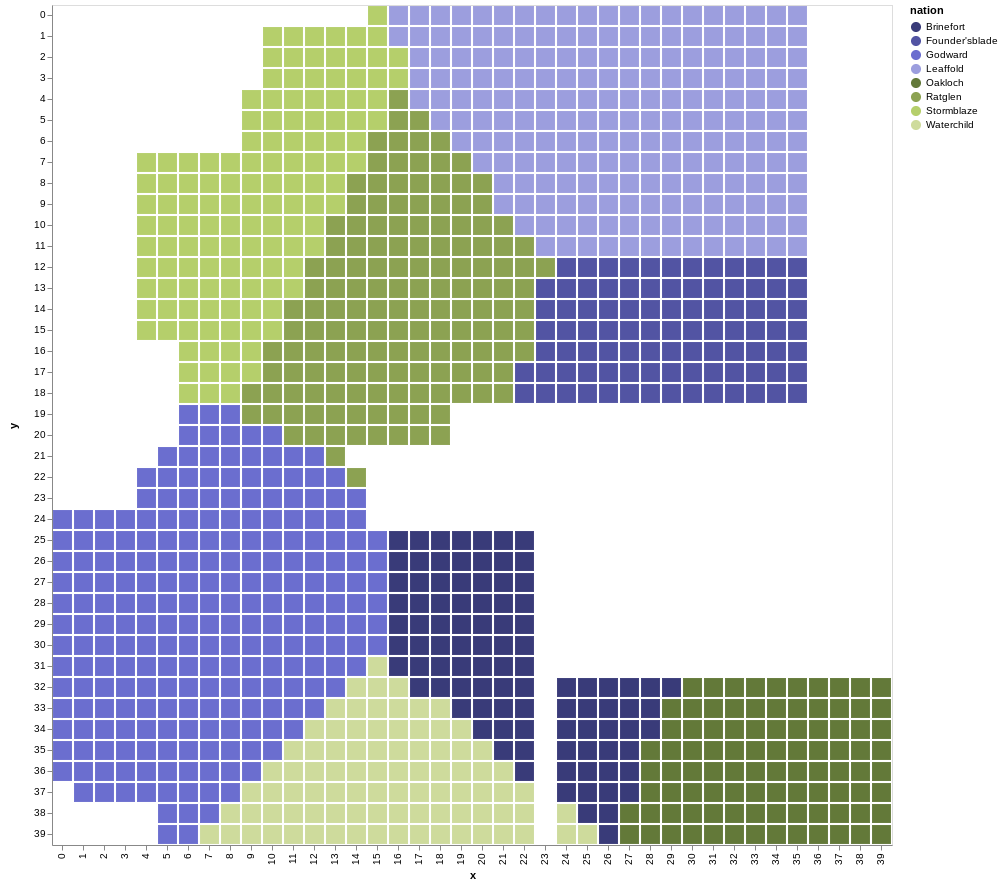

In [16]:
predicted_nations = k_means.predict(df.loc[(df['feature']!='ocean')& \
                                           (df['feature']!='city')]
                                    [['x','y']]
                                   )
df.loc[(df['feature']!='ocean')& \
       (df['feature']!='city'),'nation number'] = predicted_nations

df['nation'] = df['nation number'].apply(lambda x: build.assignNation(x,landscape))

draw.drawboarders(df)

In [23]:
#for each nation (n), appoint the most populus city (c) as it's capitol.
for n in np.unique(df['nation'].dropna()):
    c = df[(df['nation']==n)& \
          (df['feature']=='city')]['town'].tolist()
    #getting the town objects
    ts = [t for t in towns if t.name in c]
    #get population(p)
    p = [t.pop for t in ts]
    #getting the first town that has the max population, make that the capitol
    ts[np.argmax(p)].type='capitol'
    
towns

[capitol of Stormlight: population: 2 location: [18,14] founded 0,
 capitol of Buckloch: population: 4 location: [28,10] founded 0,
 capitol of Stonelight: population: 6 location: [34,37] founded 0,
 town of Clearrun: population: 4 location: [38,32] founded 0,
 town of Godmark: population: 3 location: [28,18] founded 1,
 town of Icechild: population: 1 location: [17,39] founded 2,
 town of Badgerford: population: 4 location: [35,37] founded 3,
 capitol of King'sjaw: population: 4 location: [25,33] founded 3,
 town of Magerail: population: 4 location: [23,8] founded 3,
 capitol of Splitmain: population: 3 location: [9,29] founded 4,
 capitol of Fairrun: population: 4 location: [25,15] founded 4,
 capitol of Land'srise: population: 3 location: [18,36] founded 4,
 town of Artbridge: population: 2 location: [17,38] founded 5,
 town of Lilymelt: population: 1 location: [16,36] founded 5,
 capitol of Doomrest: population: 4 location: [9,5] founded 5,
 town of Magecombe: population: 2 locatio

In [21]:
world = {"landscape":landscape,
        "df":df,
        'towns':towns}

with open('world_1.p', 'wb') as pickle_file:
    pickle.dump(world, pickle_file)